In [16]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy
import pandas
import seaborn
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pandas.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [17]:
crimes = pandas.read_csv('table_8.csv', thousands=',')
crimes.fillna(0, inplace=True)

In [18]:
crimes

,City,Population,Violent_crime,Murder,Rape1,Rape2,Robbery,Assault,Property_crime,Burglary,Larceny- theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,0.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,0.000
4,Albion Village,6388.000,23.000,0.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000
5,Alfred Village,4089.000,5.000,0.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000,0.000
6,Allegany Village,1781.000,3.000,0.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000
7,Amherst Town,118296.000,107.000,1.000,0.000,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000
8,Amityville Village,9519.000,9.000,0.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000
9,Amsterdam,18182.000,30.000,0.000,0.000,0.000,12.000,18.000,405.000,99.000,291.000,15.000,0.000


# Clean the Data

In [19]:
# Remove empty rows/columns
crimes = crimes[:-3]
crimes = crimes.drop(['Rape1'], axis=1)

data = crimes[['City','Population','Murder', 'Robbery', 'Property_crime']].sort_values(by=['Population'], ascending =False)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


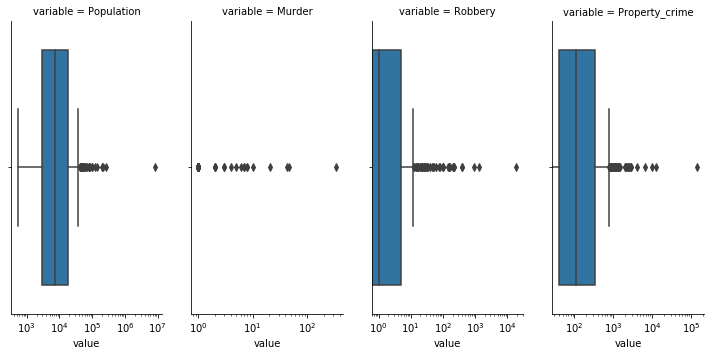

In [20]:
# Check for outliers
datag = pandas.melt(data, id_vars=['City'])
datag.head()
graph = seaborn.FacetGrid(datag, col="variable", sharey=False, sharex=False, col_wrap = 5, height = 5, aspect=.5)
graph = (graph.map(seaborn.boxplot, "value"))
graph = graph.set(xscale="log")

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


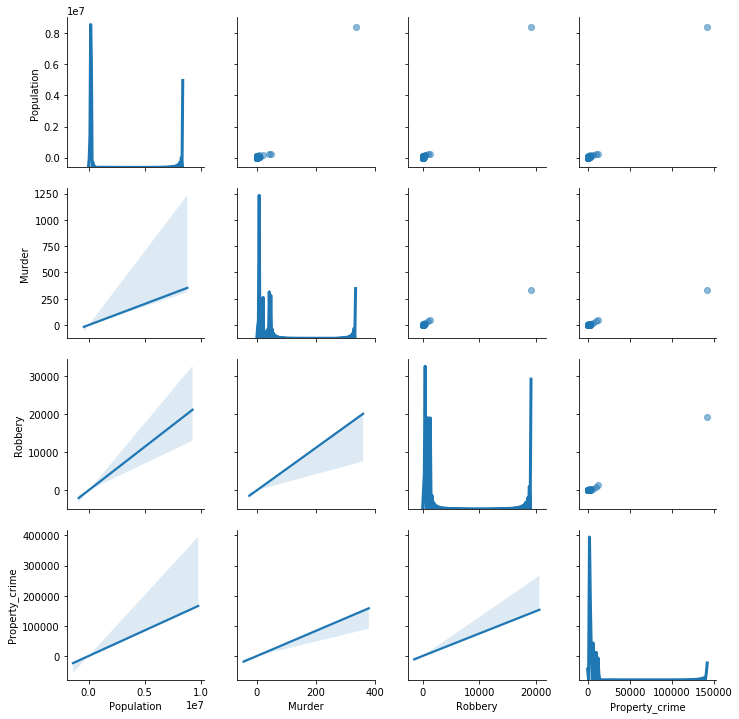

In [21]:
# Make a scatterplot matrix.
graph = seaborn.PairGrid(data.dropna(), diag_sharey=False)
# Scatterplot.
graph.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
graph.map_lower(seaborn.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
graph.map_diag(seaborn.kdeplot, lw=3)
plt.show()

In [22]:
data.head()

,City,Population,Murder,Robbery,Property_crime
216,New York,8396126.000,335.000,19170.000,141971.000
35,Buffalo,258789.000,47.000,1322.000,12491.000
272,Rochester,210562.000,42.000,918.000,10051.000
346,Yonkers,199134.000,6.000,390.000,2368.000
310,Syracuse,143834.000,21.000,400.000,6473.000


With New York being so much more dramatically larger than the others in Pop, Pop2, Property_crime trends are difficult/impossible to see.

In [23]:
# Remove outlier (New York)

data1 = data[1:]
data1.head()

,City,Population,Murder,Robbery,Property_crime
35,Buffalo,258789.000,47.000,1322.000,12491.000
272,Rochester,210562.000,42.000,918.000,10051.000
346,Yonkers,199134.000,6.000,390.000,2368.000
310,Syracuse,143834.000,21.000,400.000,6473.000
7,Amherst Town,118296.000,1.000,31.000,2118.000


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


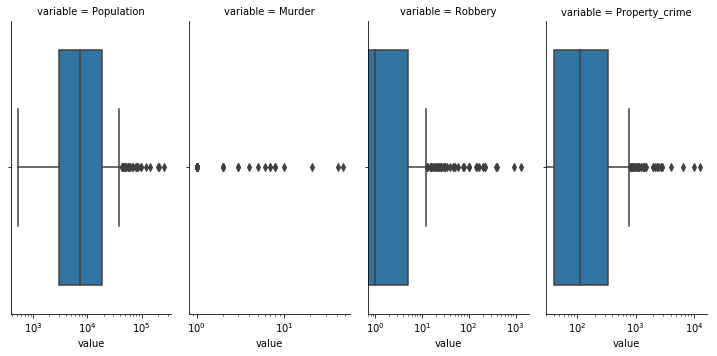

In [24]:
# Check data without outlier (New York)

# Check for outliers
data1g = pandas.melt(data1, id_vars=['City'])
data1g.head()
graph = seaborn.FacetGrid(data1g, col="variable", sharey=False, sharex=False, col_wrap = 5, height = 5, aspect=.5)
graph = (graph.map(seaborn.boxplot, "value"))
graph = graph.set(xscale="log")

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


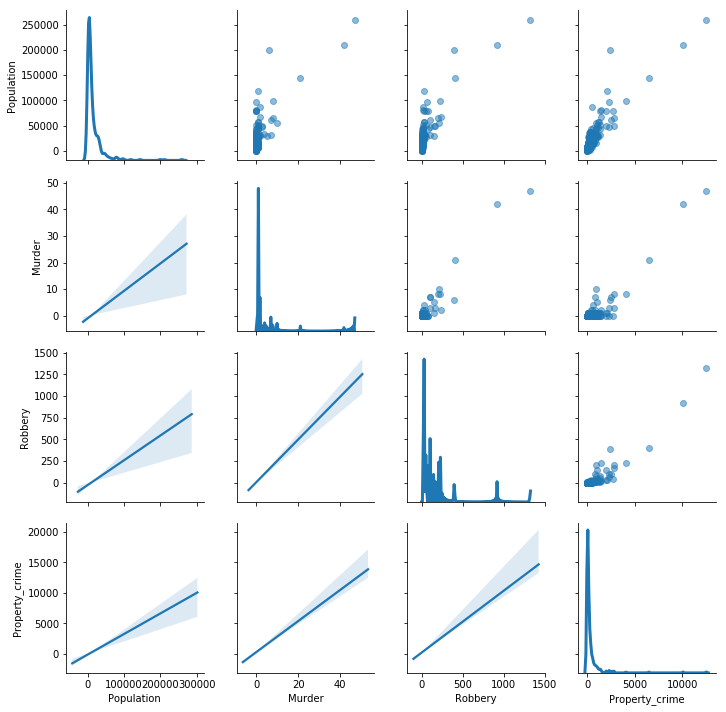

In [25]:
#714 PairPlot to seaborn.PairGrid

# Make a scatterplot matrix.
graph = seaborn.PairGrid(data1.dropna(), diag_sharey=False)
# Scatterplot.
graph.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
graph.map_lower(seaborn.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
graph.map_diag(seaborn.kdeplot, lw=3)
plt.show()

There are still some significantly larger cities but now other populations are visible, will not remove any further outliers

## Generate Features

In [26]:
# Create 2 categorical columns and pop^2

# w/ NYC
data.insert(2,'Pop2', data['Population']**2)

data.insert(3,'Murder_dum',numpy.where(data['Murder']>0, 1, 0))
data.insert(5,'Robbery_dum',numpy.where(data['Robbery']>0, 1, 0))

# w/o NYC
#data1['Pop2'] = data1['Population']**2
data1.insert(2,'Pop2', data1['Population']**2)

data1.insert(3,'Murder_dum',numpy.where(data1['Murder']>0, 1, 0))
data1.insert(6,'Robbery_dum',numpy.where(data1['Robbery']>0, 1, 0))
#data = crimes[['Population','Pop2','Murder_dum', 'Robbery_dum', 'Property_crime']].sort_values(by=['Population'], ascending =False)

In [27]:
data1

,City,Population,Pop2,Murder_dum,Murder,Robbery,Robbery_dum,Property_crime
35,Buffalo,258789.000,66971746521.000,1,47.000,1322.000,1,12491.000
272,Rochester,210562.000,44336355844.000,1,42.000,918.000,1,10051.000
346,Yonkers,199134.000,39654349956.000,1,6.000,390.000,1,2368.000
310,Syracuse,143834.000,20688219556.000,1,21.000,400.000,1,6473.000
7,Amherst Town,118296.000,13993943616.000,1,1.000,31.000,1,2118.000
3,Albany,97956.000,9595377936.000,1,8.000,227.000,1,4090.000
126,Greece Town,96667.000,9344508889.000,0,0.000,60.000,1,2303.000
267,Ramapo Town,87204.000,7604537616.000,1,2.000,9.000,1,567.000
57,Clarkstown Town,80705.000,6513297025.000,0,0.000,17.000,1,1515.000
214,New Rochelle,78800.000,6209440000.000,0,0.000,81.000,1,1391.000


## Generate Model

In [28]:
# function for linear reg modeling

def lin_model(rdata, target):
    # Instantiate and fit our model.
    regr = linear_model.LinearRegression()
    
    regr.fit(rdata, target)

    # Inspect the results.
    print('\nCoefficients: \n', regr.coef_)
    print('\nIntercept: \n', regr.intercept_)
    print('\nR-squared: \n', regr.score(rdata, target))
    
    predicted = regr.predict(rdata).ravel()
    actual = target.ravel()
    
    # Calculate the error
    residual = actual - predicted
    
    # Error historgram
    plt.hist(residual)
    plt.title('Residual Counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()
    
    # Error scatter plot
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()
    


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared: 
 0.9961247104988709


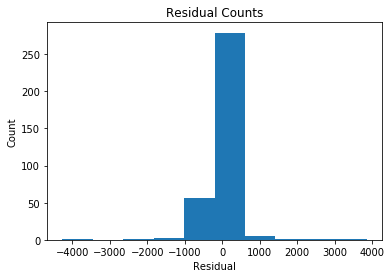

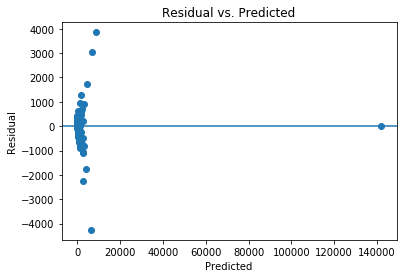

In [29]:
target = data['Property_crime'].values.reshape(-1, 1)
rdata = data[['Population', 'Pop2', 'Murder_dum', 'Robbery_dum']]

lin_model(rdata, target)

With New York inculded we get 0.996 as R squared, this is overfitting


Coefficients: 
 [[1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]]

Intercept: 
 [-16.81586632]

R-squared: 
 0.8444937611173492


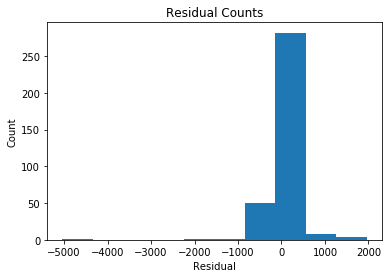

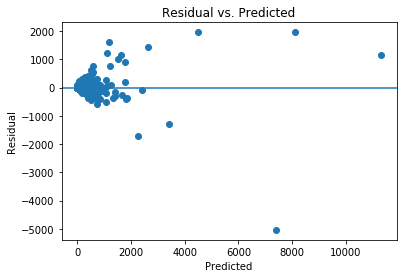

In [30]:
target = data1['Property_crime'].values.reshape(-1, 1)
rdata = data1[['Population', 'Pop2', 'Murder_dum', 'Robbery_dum']]

lin_model(rdata, target)


Coefficients: 
 [[ 2.05519792e-02 -7.19468320e-08  1.02643383e+02  5.13001360e+00]]

Intercept: 
 [-25.0398582]

R-squared: 
 0.939283140822447


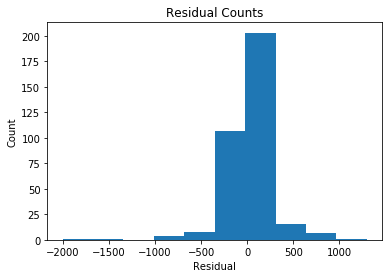

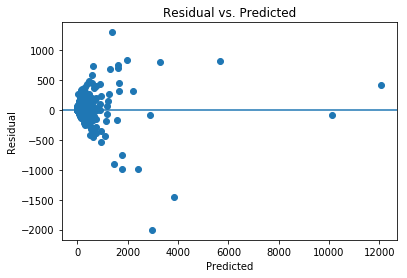

In [31]:
target = data1['Property_crime'].values.reshape(-1, 1)
rdata = data1[['Population', 'Pop2', 'Murder', 'Robbery']]

lin_model(rdata, target)

Running regression on the cities minus NYC, but with Murder and Robbery both as continuous gives us a much improved R squared along with more relevance across the board on data, while Murder is still the primary factor it's less dominant with this combination of independent variables.